In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [2]:
N = 1000 
gaussian_quantiles = make_gaussian_quantiles(n_samples= N, mean=None, cov = 0.1, n_features=2, n_classes=2, shuffle=True, random_state=None)

In [3]:
X, Y = gaussian_quantiles
X.shape, Y.shape

((1000, 2), (1000,))

In [4]:
Y = Y[:, np.newaxis]

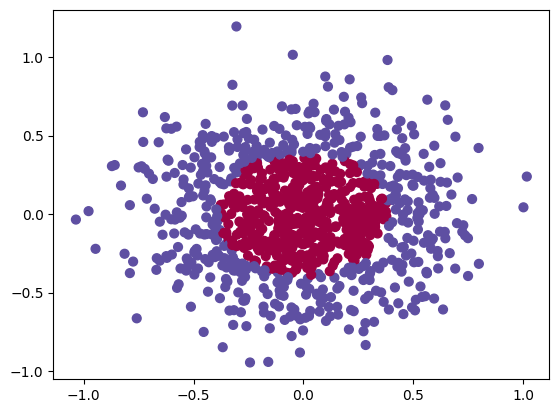

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y.ravel(), s=40, cmap=plt.cm.Spectral)
plt.show()

# Activation functions

In [6]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x) / ((np.exp(-x) + 1) **2)
    else:
        return 1 / (1 + np.exp(-x))
    
def relu(x, derivate = False):
    if derivate:
        x[X <= 0] = 0
        x[X > 0] = 1
        return x
    else:
        return np.maximum(0, x)

# Loss function

In [7]:
def mse(y, y_hat, derivate = False):
    if derivate:
        return (y_hat - y)
    else:
        return np.mean((y_hat - y) ** 2)

In [ ]:
def inizialize_parameters_deep(layers_dim):
    parameters = {}
    L = len(layers_dim)
    